# Importing Necessary Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.style.use('seaborn')

# Importing the Data

In [16]:
df = pd.read_csv("diabetes2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
data = df.values

# Splitting the Data

In [19]:
x = data[:,:-1]
y = data[:,-1]

# Normalization

In [20]:
#Normalisation
x_mean = x.mean(axis=0)
x_std = x.std(axis=0)

X = (x-x_mean)/x_std

In [21]:
X.shape,y.shape

((768, 8), (768,))

# Logistic Regression

In [22]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))
def error(X,y,theta):
    hi = hypothesis(X,theta)
    e = -1*np.mean((y*np.log(hi) + ((1-y)*np.log(1-hi))))
    return e
def gradient(X,y,theta):
    hi = hypothesis(X,theta)
    grad = -(np.dot(X.T,(y-hi)))
    m = X.shape[0]
    return grad/m
def gradientDescent(X,y,lr = 0.1, epochs = 300):
    ones = np.ones((X.shape[0],1))
    X_ = np.hstack((ones,X))
    y = y.reshape((-1,1))

    n = X_.shape[1]
    theta = np.zeros((n,1))
    error_list = []
    for i in range(epochs):
        error_list.append(error(X_,y,theta))
        grad = gradient(X_,y,theta)
        theta = theta - lr*grad
    return theta,error_list

In [23]:
theta,err = gradientDescent(X,y, lr=0.5,epochs=500)

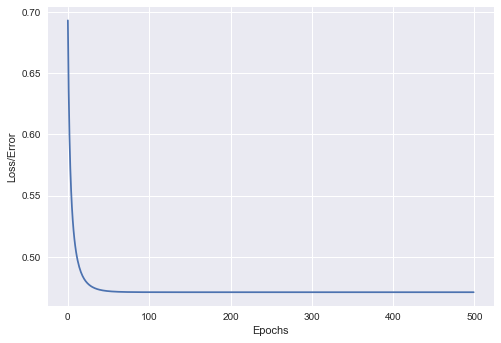

In [24]:
plt.plot(err)
plt.xlabel("Epochs")
plt.ylabel("Loss/Error")
plt.show()

# Weights of the Logistic Regression Agorithm

In [25]:
theta

array([[-0.87110174],
       [ 0.41480203],
       [ 1.12354378],
       [-0.25717844],
       [ 0.00986739],
       [-0.13724668],
       [ 0.70675627],
       [ 0.31296112],
       [ 0.17474908]])

# Making Predictions

In [26]:
def predict(X,theta):
    ones = np.ones((X.shape[0],1))
    X_ = np.hstack((ones,X))
    h = hypothesis(X_,theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    output = output.astype('int')
    return output
XT_pred = predict(X,theta)

# Making a Confusion Matrix

In [27]:
CM = confusion_matrix(XT_pred, y, labels=[1,0])
TP=CM[0][0]
FP=CM[0][1]
FN=CM[1][0]
TN=CM[1][1]

ACC = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy is : \n', ACC)
print('--------------------------------')
Rec = TP/(TP+FN)
print('Recall is : \n', Rec)
print('--------------------------------')
Prec = TP/(TP+FP)
print('Precsion is : \n', Prec)
print('--------------------------------')
F1 = 2 * ((Prec * Rec)/(Prec + Rec))
print('F1 score is : \n', F1)
print('--------------------------------')

Accuracy is : 
 0.7825520833333334
--------------------------------
Recall is : 
 0.582089552238806
--------------------------------
Precsion is : 
 0.7393364928909952
--------------------------------
F1 score is : 
 0.651356993736952
--------------------------------


[]

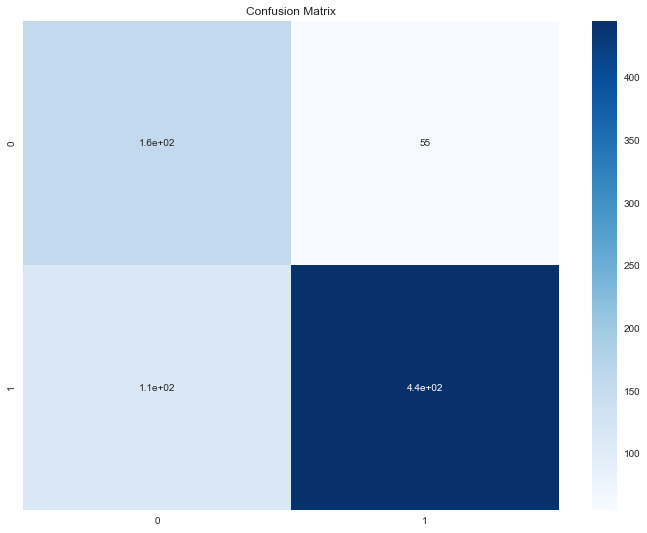

In [28]:
import seaborn as sns

plt.figure(figsize=(12,9))
plt.ticklabel_format(useOffset=False, style='plain')
plt.title("Confusion Matrix")
sns.heatmap(CM,annot=True,cmap=plt.cm.Blues)
plt.plot()

# AUC and ROC Curve Calculations

In [85]:
def probabilities(X,theta):
    ones = np.ones((X.shape[0],1))
    X_ = np.hstack((ones,X))
    h = hypothesis(X_,theta)
    return h

def true_false_positive(threshold_vector, y_test):
    TP = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    TN = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    FP = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    FN = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = TP.sum() / (TP.sum() + FN.sum())
    fpr = FP.sum() / (FP.sum() + TN.sum())
    return tpr, fpr

def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):
        
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
        
    return roc.reshape(-1, 2)

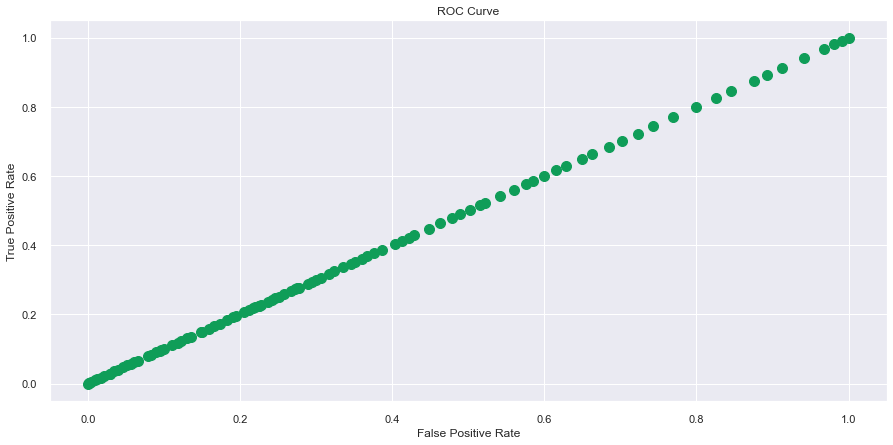

In [91]:
prob_vector = probabilities(X,theta)
sns.set()
plt.figure(figsize=(15,7))

ROC = roc_from_scratch(prob_vector,y,partitions=100)
plt.scatter(ROC[:,0],ROC[:,1],color='#0F9D58',s=100)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

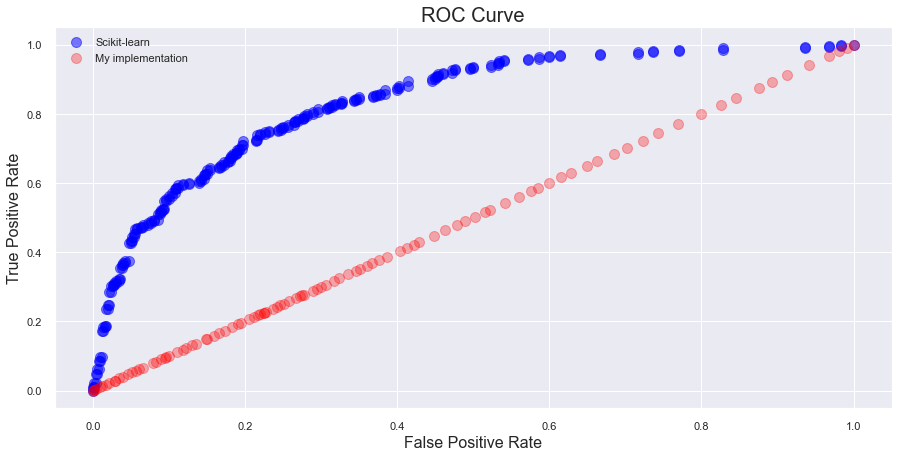

In [92]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, prob_vector)

plt.figure(figsize=(15, 7))
plt.scatter(fpr, tpr, s=100, alpha=0.5, color="blue", label="Scikit-learn")
plt.scatter(
    ROC[:, 0], ROC[:, 1], color="red", s=100, alpha=0.3, label="My implementation"
)
plt.title("ROC Curve", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.legend()
plt.show()